# Topic covid-19 Analysis
1.Here I have India the covid-19 india data.
2.Also take state wise data for deep analysis.
3.This dataset are taken from various site to get the actual inside of the covid-19 patteren.
4.Links for the data set are:
a.https://in.springboard.com/blog/data-modelling-covid/
b.https://www.kaggle.com/sudalairajkumar/covid19-in-india?select=StatewiseTestingDetails.csv
c.https://covid19.who.int/table


# Aim To Achive
1.To analyse the total confirmed case in india every month vs total date case in india every month.
2.To analyse the the state level data. 
3.To have grapical view of total confiremed,death,active,recovery cases of every state in india.
4.To have close look of every state total confiremed,death,active,recovery cases.
5.To analyse the total covid test taken every month for every state.


# Import the packages necessary for the solution
1.Sparksession act as a gateway to enter the Spark enviriment and use the function of spark
2.Pysark.sql.type are been use here to define the schema of file.
3.pandas is use to built the dataframe.

In [1]:

from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField,StringType,IntegerType,FloatType,DateType,DoubleType
import pandas as pd

In [2]:
#create speark session with app name 'my session'
session=SparkSession.builder.appName('my session').getOrCreate()

# To analyse the total confirmed case in india every month vs total date case in india every month.

In [3]:
#createting schema to import data in the desire format.
schema=StructType([
    StructField('Date_reported',DateType(),True),
    StructField(' Country_code',StringType(),True),
    StructField(' Country',StringType(),True),
    StructField(' WHO_region',StringType(),True),
    StructField(' New_cases',IntegerType(),True),
    StructField(' Cumulative_cases',IntegerType(),True),
    StructField(' New_deaths',IntegerType(),True),
    StructField(' Cumulative_deaths',IntegerType(),True)
])

In [4]:
#The dataset are taken from 'https://covid19.who.int/table'.
#This dataset consist of data for all the country.
who_data = session.read.option('header', True).schema(schema).csv("./WHO-COVID-19-global-data.csv")

In [5]:
#check the schema of dataset
who_data.printSchema()

root
 |-- Date_reported: date (nullable = true)
 |--  Country_code: string (nullable = true)
 |--  Country: string (nullable = true)
 |--  WHO_region: string (nullable = true)
 |--  New_cases: integer (nullable = true)
 |--  Cumulative_cases: integer (nullable = true)
 |--  New_deaths: integer (nullable = true)
 |--  Cumulative_deaths: integer (nullable = true)



Select all the columns reqire for analysis and dicard the rest.

In [10]:
#select the required column from data
who_data.select('Date_reported',' Country_code',' Country',' New_cases',' New_deaths')

DataFrame[Date_reported: date,  Country_code: string,  Country: string,  New_cases: int,  New_deaths: int]

In [11]:
#convert the data into data frame
who_data_DF=who_data.toPandas()

1.The user input to select the country code for which you want to analysis example for india country code in IN.
2.Then we filter the data for that country and put into the dataframe.

In [12]:
#user input for country data to analyse.
country_code=input("enter code of country e.g for India ente IN : ")
#Filter the data for the user input country.
country_df=who_data_DF.loc[who_data_DF[' Country_code']==country_code]

enter code of country e.g for India ente IN : IN


1.To have the monthly analysis of country data we need to group the data montly wise.

In [14]:
#Group the data month wise the total case confirmed and total death every month
country_df['Date_reported']=pd.to_datetime(country_df['Date_reported'])
mon=country_df.Date_reported.dt.to_period("M") # month variable created
India_df=country_df.groupby(mon).sum()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


After the groupby we need to rename few column.

In [ ]:
#Rename the columns
India_df=India_df.rename(columns={' New_cases':'Total Cases',' New_deaths':'Total death'})

# Analysis of confirmed and death record montly.
1.The blue line indicate the total no of cases occour in india every month.
2.The orange line indicate the total no of deadth case in india every month.

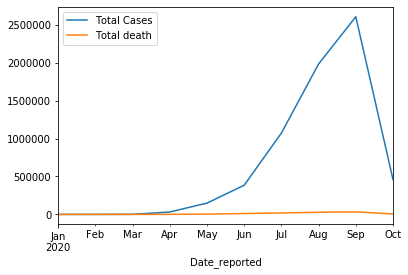

In [16]:

import matplotlib.pyplot as plt
ax=India_df.plot(y='Total Cases',kind='line')
India_df.plot(y='Total death',kind='line',ax=ax)
plt.show()

# To analyse the the state level data. 

In [17]:
#load the statewise data for analysis from 
#'https://www.kaggle.com/sudalairajkumar/covid19-in-india?select=StatewiseTestingDetails.csv'
state_data=session.read.load('./state_wise.csv',format='csv',sep=',',inferSchema=True,header="True")

In [18]:
#Filter the column needed for analysis
state_data=state_data.select('State','Confirmed','Recovered','Deaths','Active')

In [19]:
# check the schema 
state_data.printSchema()

root
 |-- State: string (nullable = true)
 |-- Confirmed: integer (nullable = true)
 |-- Recovered: integer (nullable = true)
 |-- Deaths: integer (nullable = true)
 |-- Active: integer (nullable = true)



In [20]:
#conver the state_data to dataframe and clean the data
state_data_df=(state_data.toPandas())[1:36]




In [21]:
#take the user input to view the report for confirmecase,Recovery,Death,Active:
case=input('''"enter any one following option to see the analysis
           1.Confirmed
           2.Recovered
           3:Deaths
           4.Active 
           "
           ''')

"enter any one following option to see the analysis
           1.Confirmed
           2.Recovered
           3:Deaths
           4.Active 
           "
           Active


# To have grapical view of total confiremed,death,active,recovery cases of every state in india.

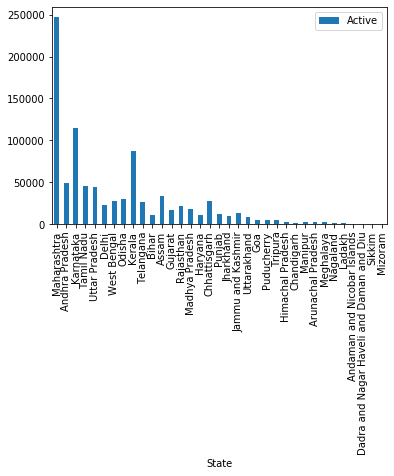

In [22]:
state_data_df.plot(x='State',y=case,kind='bar')

# To have close look of every state total confiremed,death,active,recovery cases.

In [23]:
#for satate wise analysis the data is been transposed useing transpose method.
state_data_df_tr=state_data_df.transpose()
#set the first row as header for the transposed dataset.
new_header=state_data_df_tr.iloc[0]
state_data_df_tr=state_data_df_tr[1:]
state_data_df_tr.columns=new_header

enter state name : Delhi
yes


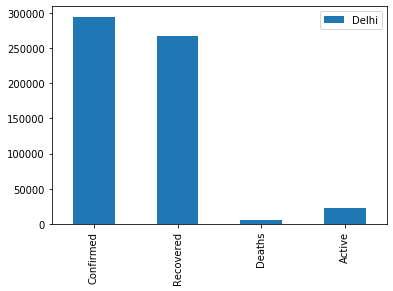

In [24]:
#Enter the state name for which you want to see the survay.
state_name=input("enter state name : ")
# It will check the state in dataset and give the visual report.
if state_name in state_data_df_tr.columns:
    print("yes")
    state_data_df_tr.plot(y=state_name,kind='bar')

# To analyse the total covid test taken every month for every state.

In [27]:
#createting schema to import data in the desire format.
state_schema=StructType([
    StructField('Date',DateType(),True),
    StructField('State',StringType(),True),
    StructField('TotalSamples',DoubleType(),True),
    StructField('Negative',IntegerType(),True),
    StructField('Positive',IntegerType(),True)
])

In [28]:
#load the data of state wise covid test taken from 
#'https://www.kaggle.com/sudalairajkumar/covid19-in-india?select=StatewiseTestingDetails.csv'
state_test=session.read.option('header', True).schema(state_schema).csv('./StatewiseTestingDetails.csv')

In [29]:
#chech the schema
state_test.printSchema()

root
 |-- Date: date (nullable = true)
 |-- State: string (nullable = true)
 |-- TotalSamples: double (nullable = true)
 |-- Negative: integer (nullable = true)
 |-- Positive: integer (nullable = true)



In [30]:
#Conver the data to pandas. 
state_test_df=state_test.toPandas()

In [31]:
#Create a new column for month to group the data monthly.
from pyspark.sql.functions import month
state_test=state_test.withColumn("month",month(state_test.Date))

In [32]:
#Create the temporary table 
state_test.registerTempTable('state_test_temp')


In [33]:
#Create the desire table using sql table for desire format
state_test=session.sql("select state,month,sum(TotalSamples) as TotalSamples from state_test_temp group by State,month order by State,month")

In [34]:
#convert the data into dataframe
state_test_df=state_test.toPandas()

enter state name : Delhi


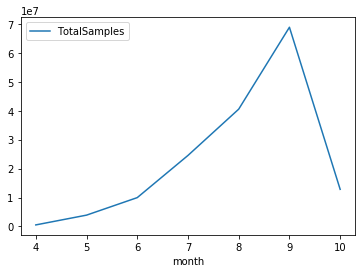

In [39]:
#Enter the state name for wich want to see the record for rest taken.

state_test=input("enter state name : ")
test_df=state_test_df.loc[state_test_df['state']==state_test]
test_df.plot(x='month',y='TotalSamples',kind='line')